In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve,f1_score

In [132]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [29]:
data=pd.read_csv('Customer-Churn.csv')

In [30]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [32]:
data.describe(include='O').T

,count,unique,top,freq
customerID,7043,7043,6729-FZWSY,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [34]:
#The varaible was imported as a string we need to convert it to float
data['TotalCharges'] =data['TotalCharges'].convert_objects(convert_numeric=True)
#telecom['tenure'] = telecom['tenure'].astype(int).astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [35]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [36]:
#Checking for Missing Values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [37]:
#Handling the Missing Values
data.fillna(data['TotalCharges'].mean(),inplace=True)

In [38]:
#Checking for Missing Values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [39]:
# Converting Yes to 1 and No to 0
data['PhoneService'] = data['PhoneService'].map({'Yes': 1, 'No': 0})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'Yes': 1, 'No': 0})
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
data['Partner'] = data['Partner'].map({'Yes': 1, 'No': 0})
data['Dependents'] = data['Dependents'].map({'Yes': 1, 'No': 0})

In [42]:
data.set_index('customerID',inplace=True)

In [47]:
# Checking for outliers in the continuous variables
num_data = data[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2265.000258
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,402.225000
50%,29.000000,70.350000,0.000000,1400.550000
75%,55.000000,89.850000,0.000000,3786.600000
90%,69.000000,102.600000,1.000000,5973.690000
95%,72.000000,107.400000,1.000000,6921.025000
99%,72.000000,114.729000,1.000000,8039.256000


In [43]:
data=pd.get_dummies(data)

### Variance Inflation Factor (VIF) (Checking for multi collinearity)

In [104]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index =data.columns)
VIF

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


SeniorCitizen                                1.155267
Partner                                      1.462802
Dependents                                   1.384797
tenure                                       7.320128
PhoneService                                      inf
PaperlessBilling                             1.212510
MonthlyCharges                             865.064571
TotalCharges                                10.615125
Churn                                        1.397363
gender_Female                                     inf
gender_Male                                       inf
MultipleLines_No                                  inf
MultipleLines_No phone service                    inf
MultipleLines_Yes                                 inf
InternetService_DSL                               inf
InternetService_Fiber optic                       inf
InternetService_No                                inf
OnlineSecurity_No                                 inf
OnlineSecurity_No internet s

From this list, we clearly see that there happens to be Independent Variable over the value of 5, which means that there are some features that exhibit the Multicollinearity in the dataset. Note that VIF only works for the Continuous Variables. 

In [44]:
x=data.drop('Churn',axis=1)
y=data[['Churn']]

In [45]:
x.shape,y.shape

((7043, 41), (7043, 1))

In [48]:
from sklearn.preprocessing import StandardScaler
x_scaled=StandardScaler()
x_scaled.fit(x)
x_scaled=x_scaled.transform(x)

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=1)

In [52]:
x_train.shape,y_train.shape

((5634, 41), (5634, 1))

### Variance Inflation Factor (VIF) (Checking for multi collinearity)

In [110]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for Continuous Variable)
VIF = pd.Series([variance_inflation_factor(pd.DataFrame(x_train).values, i) for i in range(pd.DataFrame(x_train).shape[1])], index =x.columns)
VIF

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


SeniorCitizen                                1.151341
Partner                                      1.463359
Dependents                                   1.379965
tenure                                       7.444633
PhoneService                                      inf
PaperlessBilling                             1.206484
MonthlyCharges                             860.039168
TotalCharges                                10.648647
gender_Female                                     inf
gender_Male                                       inf
MultipleLines_No                                  inf
MultipleLines_No phone service                    inf
MultipleLines_Yes                                 inf
InternetService_DSL                               inf
InternetService_Fiber optic                       inf
InternetService_No                                inf
OnlineSecurity_No                                 inf
OnlineSecurity_No internet service                inf
OnlineSecurity_Yes          

In [103]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
#We used binomial because its Classification problem
logm1.fit().summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:932: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\ProgramData\Anaconda3\lib\site-packages\

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                            GLM   Df Residuals:                     5610
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 05 Aug 2020   Deviance:                          nan
Time:                        13:09:52   Pearson chi2:                 1.09e+19
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.093e+14   4.41e+05  -7.02e+08      0.000   -3.09e+14   -3.09e+14
x1          4088.1470      0.645   6336.781      0.000    4086.883    4089.412
x2          1699.9403      0.423   4015.377      0.000    1699.111    1700.770
x3         -8460.4394      1.235  -6851.282      0.000   -8462.860   -8458.019
x4          3.427e+04      4.972   6893.684      0.000    3.43e+04    3.43e+04
x5          1891.3812      0.958   1974.562      0.000    1889.504    1893.259
x6         -6211.0178      0.924  -6720.737      0.000   -6212.829   -6209.207
x7          1.704e+04      9.338   1824.353      0.000     1.7e+04    1.71e+04
x8          -2.05e+04      3.180  -6446.909      0.000   -2.05e+04   -2.05e+04
x9         -2159.9486      0.333  -6487.024      0.000   -2160.601   -2159.296
x10         2160.0856      0.333   6487.435      0.000    2159.433    2160.738
x11         5611.4658      0.808   6941.439      0.000    5609.881    5613.050
x12        -1891.3634      0.958  -1974.544      0.000   -1893.241   -1889.486
x13        -4545.6450      0.902  -5038.911      0.000   -4547.413   -4543.877
x14        -5069.2722      1.727  -2935.029      0.000   -5072.657   -5065.887
x15         2862.8890      2.161   1324.637      0.000    2858.653    2867.125
x16         2393.9019      0.819   2923.345      0.000    2392.297    2395.507
x17         3866.8658      0.574   6730.837      0.000    3865.740    3867.992
x18         2393.9977      0.819   2923.462      0.000    2392.393    2395.603
x19        -6456.1011      1.183  -5459.658      0.000   -6458.419   -6453.783
x20         1295.8137      0.247   5248.950      0.000    1295.330    1296.298
x21         2393.9479      0.819   2923.401      0.000    2392.343    2395.553
x22        -3428.1587      0.856  -4004.792      0.000   -3429.836   -3426.481
x23        -3796.1191      0.558  -6799.264      0.000   -3797.213   -3795.025
x24         2393.9441      0.819   2923.397      0.000    2392.339    2395.549
x25         1889.4995      0.726   2603.616      0.000    1888.077    1890.922
x26        -6806.4745      0.964  -7057.834      0.000   -6808.365   -6804.584
x27         2393.9441      0.819   2923.397      0.000    2392.339    2395.549
x28         5326.0356      1.028   5179.687      0.000    5324.020    5328.051
x29         1959.2009      0.496   3952.294      0.000    1958.229    1960.172
x30         2393.9441      0.819   2923.397      0.000    2392.339    2395.549
x31        -3999.4523      1.171  -3414.019      0.000   -4001.748   -3997.156
x32         1.058e+04      1.541   6865.893      0.000    1.06e+04    1.06e+04
x33         2393.9441      0.819   2923.397      0.000    2392.339    2395.549
x34        -1.264e+04      2.052  -6159.767      0.000   -1.26e+04   -1.26e+04
x35         1.962e+14   2.79e+05   7.02e+08      0.000    1.96e+14    1.96e+14
x36         1.604e+14   2.28e+05   7.02e+08      0.000     1.6e+14     1.6e+14
x3

# using Sklearn

### Logistic Regression

In [53]:
model_lg = LogisticRegression()
model_lg.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
y_pred=model_lg.predict(x_test)

In [59]:
# Confusion matrix 
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[940, 121],
       [144, 204]], dtype=int64)

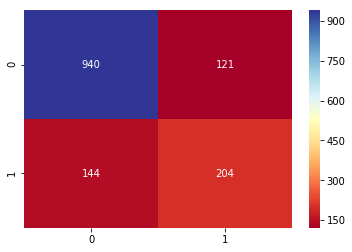

In [101]:
sns.heatmap(confusion,annot=True, cmap="RdYlBu",fmt='')

In [60]:
#Let's check the overall accuracy.
accuracy_score(y_test,y_pred)

0.8119233498935415

In [62]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.87      0.89      0.88      1061
          1       0.63      0.59      0.61       348

avg / total       0.81      0.81      0.81      1409



In [64]:
#Predict Probalility 
y_prob=model_lg.predict_proba(x_test)

In [66]:
#to find the similarity Score
from sklearn.metrics import jaccard_similarity_score

In [67]:
jaccard_similarity_score(y_test,y_pred)

0.8119233498935415

In [319]:
f1_lg=f1_score(y_test,y_pred)
f1_lg

0.49798115746971744

In [345]:
F1_Data=pd.DataFrame({'Model':['lg'],'F1_Score':[f1_lg]})
F1_Data

,Model,F1_Score
0,lg,0.497981


In [71]:
roc_auc_score(y_test,y_prob[:,1])

0.8583246666016662

In [75]:
auc_value=roc_auc_score(y_test,y_prob[:,1])

In [72]:
fpr,tpr,thersholds=roc_curve(y_test,y_prob[:,1])

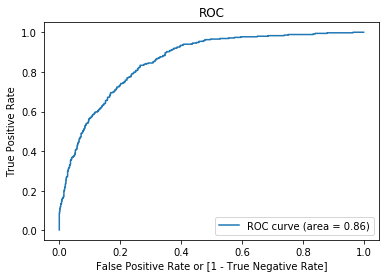

In [85]:
plt.figure()
plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % auc_value)
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [77]:
#LOg Loss
from sklearn.metrics import log_loss

In [80]:
log_loss(y_pred,y_prob)

0.24754903445030502

### Decision Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier
#Model building based on default Parameter
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [114]:
y_pred_dt=model_dt.predict(x_test)

In [115]:
# Confusion matrix 
confusion = confusion_matrix(y_test,y_pred_dt)
confusion

array([[851, 210],
       [163, 185]], dtype=int64)

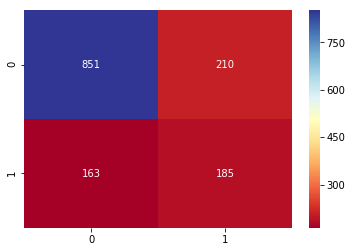

In [116]:
sns.heatmap(confusion,annot=True, cmap="RdYlBu",fmt='')

In [117]:
#Let's check the overall accuracy.
accuracy_score(y_test,y_pred_dt)

0.7352732434350603

In [332]:
f1_dt=f1_score(y_test,y_pred_dt)
f1_dt

0.49798115746971744

In [346]:
temp=pd.DataFrame({'Model':['dt'],'F1_Score':[f1_dt]})
F1_Data=pd.concat([F1_Data,temp])
F1_Data

,Model,F1_Score
0,lg,0.497981
0,dt,0.497981


In [121]:
#Predict Probalility 
y_prob_dt=model_dt.predict_proba(x_test)

In [122]:
jaccard_similarity_score(y_test,y_pred_dt)

0.7352732434350603

In [124]:
roc_auc_score(y_test,y_prob_dt[:,1])

0.6661155166997086

In [126]:
auc_value_dt=roc_auc_score(y_test,y_prob_dt[:,1])

In [127]:
fpr,tpr,thersholds=roc_curve(y_test,y_prob_dt[:,1])

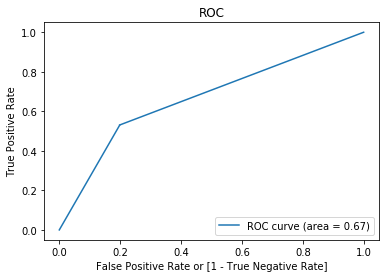

In [128]:
plt.figure()
plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % auc_value_dt)
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [129]:
#Log Loss
log_loss(y_pred,y_prob_dt)

0.0012716532783743505

In [183]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 1),
    'min_samples_leaf': range(10, 50, 10),
    'min_samples_split': range(2, 11, 1),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 15), 'min_samples_leaf': range(10, 50, 10), 'min_samples_split': range(2, 11), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [184]:
# scores of GridSearch CV
scores = grid_search.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.057278,0.077172,0.000626,0.000513,entropy,5,10,2,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.773936,...,0.783103,0.009039,433,0.797381,0.798092,0.794986,0.793256,0.803239,0.797391,0.003393
1,0.016006,0.000747,0.000399,0.000489,entropy,5,10,3,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.773936,...,0.783103,0.009039,433,0.797381,0.798092,0.794986,0.793256,0.803239,0.797391,0.003393
2,0.018865,0.006304,0.000599,0.000489,entropy,5,10,4,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.773936,...,0.783103,0.009039,433,0.797381,0.798092,0.794986,0.793256,0.803239,0.797391,0.003393
3,0.015748,0.000482,0.000822,0.000414,entropy,5,10,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.773936,...,0.783103,0.009039,433,0.797381,0.798092,0.794986,0.793256,0.803239,0.797391,0.003393
4,0.016520,0.001519,0.000841,0.000428,entropy,5,10,6,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.773936,...,0.783103,0.009039,433,0.797381,0.798092,0.794986,0.793256,0.803239,0.797391,0.003393


In [185]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.7930422435214768
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=40, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [186]:
ent_dt=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=40, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
ent_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=40, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [187]:
y_pred_dt1=ent_dt.predict(x_test)

In [188]:
# Confusion matrix 
confusion = confusion_matrix(y_test,y_pred_dt1)
confusion

array([[941, 120],
       [167, 181]], dtype=int64)

In [189]:
#Let's check the overall accuracy.
accuracy_score(y_test,y_pred_dt1)

0.7963094393186657

In [347]:
f1_dt1=f1_score(y_test,y_pred_dt1)
f1_dt1

0.5577812018489985

In [348]:
temp=pd.DataFrame({'Model':['gs_dt'],'F1_Score':[f1_dt1]})
F1_Data=pd.concat([F1_Data,temp])
F1_Data

,Model,F1_Score
0,lg,0.497981
0,dt,0.497981
0,gs_dt,0.557781


In [190]:
#Predict Probalility 
y_prob_dt1=ent_dt.predict_proba(x_test)

In [191]:
auc_value_dt=roc_auc_score(y_test,y_prob_dt1[:,1])
auc_value_dt

0.8396167137920201

In [192]:
fpr,tpr,thersholds=roc_curve(y_test,y_prob_dt1[:,1])

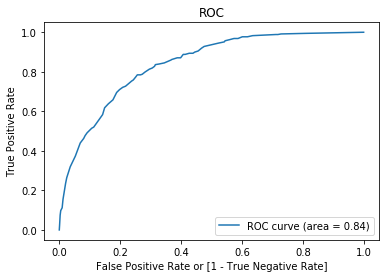

In [193]:
plt.figure()
plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % auc_value_dt)
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### KNN

In [194]:
from sklearn.neighbors import KNeighborsClassifier

In [195]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [196]:
y_pred_knn=model_knn.predict(x_test)

In [197]:
# Confusion matrix 
confusion = confusion_matrix(y_test,y_pred_knn)
confusion

array([[882, 179],
       [157, 191]], dtype=int64)

In [199]:
#Let's check the overall accuracy.
accuracy_score(y_test,y_pred_knn)

0.7615330021291696

In [349]:
f1_knn=f1_score(y_test,y_pred_knn)
f1_knn

0.532033426183844

In [350]:
temp=pd.DataFrame({'Model':['knn'],'F1_Score':[f1_knn]})
F1_Data=pd.concat([F1_Data,temp])
F1_Data

,Model,F1_Score
0,lg,0.497981
0,dt,0.497981
0,gs_dt,0.557781
0,knn,0.532033


In [200]:
#Predict Probalility 
y_prob_knn=model_knn.predict_proba(x_test)

In [206]:
auc_value_knn=roc_auc_score(y_test,y_prob_knn[:,1])
auc_value_knn

0.7793612618761308

In [211]:
fpr,tpr,thersholds=roc_curve(y_test,y_prob_knn[:,1])

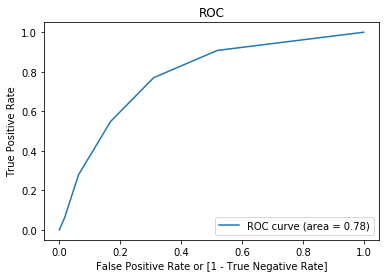

In [212]:
plt.figure()
plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % auc_value_knn)
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [209]:
#GridSearchCV for KNN

from sklearn.model_selection import GridSearchCV
# Create the parameter grid 
param_grid = {'n_neighbors': range(3,10,1),
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights':['uniform', 'distance']
}

n_folds = 5

# Instantiate the grid search model
KNN = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = KNN, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  4.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(3, 10), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [210]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.7667731629392971
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')


In [213]:
gs_knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')
gs_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [214]:
y_pred_knn1=gs_knn.predict(x_test)

In [215]:
# Confusion matrix 
confusion = confusion_matrix(y_test,y_pred_knn1)
confusion

array([[946, 115],
       [182, 166]], dtype=int64)

In [216]:
#Let's check the overall accuracy.
accuracy_score(y_test,y_pred_knn1)

0.7892122072391767

In [351]:
f1_knn1=f1_score(y_test,y_pred_knn1)
f1_knn1

0.5278219395866455

In [352]:
temp=pd.DataFrame({'Model':['gs_knn'],'F1_Score':[f1_knn1]})
F1_Data=pd.concat([F1_Data,temp])
F1_Data

,Model,F1_Score
0,lg,0.497981
0,dt,0.497981
0,gs_dt,0.557781
0,knn,0.532033
0,gs_knn,0.527822


In [217]:
#Predict Probalility 
y_prob_knn1=gs_knn.predict_proba(x_test)

In [218]:
auc_value_knn1=roc_auc_score(y_test,y_prob_knn1[:,1])
auc_value_knn1

0.8077434539092376

In [219]:
fpr,tpr,thersholds=roc_curve(y_test,y_prob_knn1[:,1])

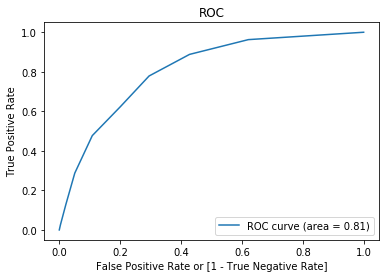

In [220]:
plt.figure()
plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % auc_value_knn1)
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [221]:
from sklearn.svm import SVC

In [234]:
model_svm = SVC(probability=True)
model_svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [235]:
y_pred_svm=model_svm.predict(x_test)

In [236]:
# Confusion matrix 
confusion = confusion_matrix(y_test,y_pred_svm)
confusion

array([[945, 116],
       [156, 192]], dtype=int64)

In [237]:
#Let's check the overall accuracy.
accuracy_score(y_test,y_pred_svm)

0.8069552874378992

In [353]:
f1_svm=f1_score(y_test,y_pred_svm)
f1_svm

0.5853658536585366

In [354]:
temp=pd.DataFrame({'Model':['svm'],'F1_Score':[f1_svm]})
F1_Data=pd.concat([F1_Data,temp])
F1_Data

,Model,F1_Score
0,lg,0.497981
0,dt,0.497981
0,gs_dt,0.557781
0,knn,0.532033
0,gs_knn,0.527822
0,svm,0.585366


In [239]:
#Predict Probalility 
y_prob_svm=model_svm.predict_proba(x_test)

In [240]:
auc_value_svm=roc_auc_score(y_test,y_prob_svm[:,1])
auc_value_svm

0.8178076960577203

In [242]:
fpr,tpr,thersholds=roc_curve(y_test,y_prob_svm[:,1])

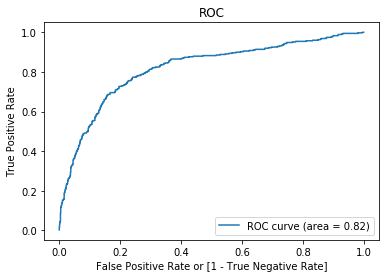

In [244]:
plt.figure()
plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % auc_value_svm)
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [248]:
#GridSearchCV for SVM

from sklearn.model_selection import GridSearchCV
# Create the parameter grid 
param_grid = {'C': range(1,10,1),  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']
}

n_folds = 3

# Instantiate the grid search model
svm = SVC()
grid_search = GridSearchCV(estimator = svm, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  3.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': range(1, 10), 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [249]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8012069577564785
SVC(C=9, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [250]:
gs_svm=SVC(C=9, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
gs_svm.fit(x_train, y_train)

SVC(C=9, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [251]:
y_pred_svm1=gs_svm.predict(x_test)

In [252]:
# Confusion matrix 
confusion = confusion_matrix(y_test,y_pred_svm1)
confusion

array([[947, 114],
       [158, 190]], dtype=int64)

In [253]:
#Let's check the overall accuracy.
accuracy_score(y_test,y_pred_svm1)

0.8069552874378992

In [355]:
f1_svm1=f1_score(y_test,y_pred_svm1)
f1_svm1

0.5828220858895706

In [356]:
temp=pd.DataFrame({'Model':['gs_svm'],'F1_Score':[f1_svm1]})
F1_Data=pd.concat([F1_Data,temp])
F1_Data

,Model,F1_Score
0,lg,0.497981
0,dt,0.497981
0,gs_dt,0.557781
0,knn,0.532033
0,gs_knn,0.527822
0,svm,0.585366
0,gs_svm,0.582822


In [254]:
#Predict Probalility 
y_prob_svm1=gs_svm.predict_proba(x_test)

In [255]:
auc_value_svm=roc_auc_score(y_test,y_prob_svm1[:,1])
auc_value_svm

0.8463754103155774

In [256]:
fpr,tpr,thersholds=roc_curve(y_test,y_prob_svm1[:,1])

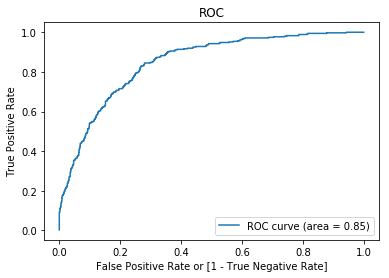

In [257]:
plt.figure()
plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % auc_value_svm)
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [268]:
from sklearn.ensemble import VotingClassifier

In [274]:
vc=VotingClassifier(estimators=[('lr', model_lg),('dt',ent_dt) ,('svm', gs_svm)], voting='hard')

In [275]:
vc.fit(x_train, y_train)
y_pred_vc=vc.predict(x_test)

In [276]:
# Confusion matrix 
confusion = confusion_matrix(y_test,y_pred_vc)
confusion

array([[948, 113],
       [152, 196]], dtype=int64)

In [277]:
#Let's check the overall accuracy.
accuracy_score(y_test,y_pred_vc)

0.8119233498935415

In [357]:
f1_vc=f1_score(y_test,y_pred_vc)
f1_vc

0.5966514459665145

In [358]:
temp=pd.DataFrame({'Model':['lg_dt_svm'],'F1_Score':[f1_vc]})
F1_Data=pd.concat([F1_Data,temp])
F1_Data

,Model,F1_Score
0,lg,0.497981
0,dt,0.497981
0,gs_dt,0.557781
0,knn,0.532033
0,gs_knn,0.527822
0,svm,0.585366
0,gs_svm,0.582822
0,lg_dt_svm,0.596651


In [280]:
from sklearn.ensemble import RandomForestClassifier

In [281]:
rf=RandomForestClassifier()

In [282]:
rf.fit(x_train, y_train)
y_pred_rf=rf.predict(x_test)

In [283]:
# Confusion matrix 
confusion = confusion_matrix(y_test,y_pred_rf)
confusion

array([[934, 127],
       [185, 163]], dtype=int64)

In [359]:
f1_rf=f1_score(y_test,y_pred_rf)
f1_rf

0.5109717868338559

In [360]:
temp=pd.DataFrame({'Model':['rf'],'F1_Score':[f1_rf]})
F1_Data=pd.concat([F1_Data,temp])
F1_Data

,Model,F1_Score
0,lg,0.497981
0,dt,0.497981
0,gs_dt,0.557781
0,knn,0.532033
0,gs_knn,0.527822
0,svm,0.585366
0,gs_svm,0.582822
0,lg_dt_svm,0.596651
0,rf,0.510972


In [285]:
#GridSearchCV for SVM

from sklearn.model_selection import GridSearchCV
# Create the parameter grid 
param_grid = {'n_estimators':range(10, 30, 2),
    'max_depth': range(5, 15, 1),
    'min_samples_leaf': range(10, 50, 10),
    'min_samples_split': range(2, 11, 1),
    'criterion': ["entropy", "gini"]
}

n_folds = 3

# Instantiate the grid search model
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 7200 candidates, totalling 21600 fits


[Parallel(n_jobs=1)]: Done 21600 out of 21600 | elapsed: 27.9min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(10, 30, 2), 'max_depth': range(5, 15), 'min_samples_leaf': range(10, 50, 10), 'min_samples_split': range(2, 11), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [286]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8035143769968051
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [287]:
y_pred_gsrf=grid_search.predict(x_test)

In [288]:
# Confusion matrix 
confusion = confusion_matrix(y_test,y_pred_gsrf)
confusion

array([[962,  99],
       [164, 184]], dtype=int64)

In [361]:
f1_rf1=f1_score(y_test,y_pred_gsrf)
f1_rf1

0.5832012678288431

In [362]:
temp=pd.DataFrame({'Model':['gs_rf'],'F1_Score':[f1_rf1]})
F1_Data=pd.concat([F1_Data,temp])
F1_Data

,Model,F1_Score
0,lg,0.497981
0,dt,0.497981
0,gs_dt,0.557781
0,knn,0.532033
0,gs_knn,0.527822
0,svm,0.585366
0,gs_svm,0.582822
0,lg_dt_svm,0.596651
0,rf,0.510972
0,gs_rf,0.583201


In [290]:
#Let's check the overall accuracy.
accuracy_score(y_test,y_pred_gsrf)

0.8133427963094393

In [291]:
gs_rf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [310]:
vc1=VotingClassifier(estimators=[('lr', model_lg),('rf',gs_rf),('svm', gs_svm)], voting='hard')

In [311]:
vc1.fit(x_train, y_train)
y_pred_vc1=vc1.predict(x_test)

In [312]:
# Confusion matrix 
confusion = confusion_matrix(y_test,y_pred_vc1)
confusion

array([[943, 118],
       [148, 200]], dtype=int64)

In [313]:
#Let's check the overall accuracy.
accuracy_score(y_test,y_pred_vc1)

0.8112136266855926

In [364]:
f1_vc1=f1_score(y_test,y_pred_vc1)
f1_vc1

0.6006006006006006

In [365]:
temp=pd.DataFrame({'Model':['lg_rf_svm'],'F1_Score':[f1_vc1]})
F1_Data=pd.concat([F1_Data,temp])
F1_Data

,Model,F1_Score
0,lg,0.497981
0,dt,0.497981
0,gs_dt,0.557781
0,knn,0.532033
0,gs_knn,0.527822
0,svm,0.585366
0,gs_svm,0.582822
0,lg_dt_svm,0.596651
0,rf,0.510972
0,gs_rf,0.583201


In [366]:
# F1 Score 
F1_Data

,Model,F1_Score
0,lg,0.497981
0,dt,0.497981
0,gs_dt,0.557781
0,knn,0.532033
0,gs_knn,0.527822
0,svm,0.585366
0,gs_svm,0.582822
0,lg_dt_svm,0.596651
0,rf,0.510972
0,gs_rf,0.583201


In [398]:
vc2=VotingClassifier(estimators=[('lr', model_lg),('rf',gs_rf),('svm', gs_svm)],n_jobs=3)

In [399]:
vc2.fit(x_train, y_train)
y_pred_vc2=vc2.predict(x_test)

In [400]:
# Confusion matrix 
confusion = confusion_matrix(y_test,y_pred_vc2)
confusion

array([[945, 116],
       [152, 196]], dtype=int64)

In [401]:
f1_vc2=f1_score(y_test,y_pred_vc2)
f1_vc2

0.593939393939394